In [339]:
import numpy as np
import pandas as pd 

df = pd.read_csv("week1.csv", comment='#')

print(df.head())

X = np.array(df.iloc[:,0])
X = X.reshape(-1, 1)

y = np.array(df.iloc[:,1])
y = y.reshape(-1, 1)


   0  -75.058740108736
0  1       -119.086428
1  2       -124.886321
2  3         10.276762
3  4       -158.196535
4  5         23.132151


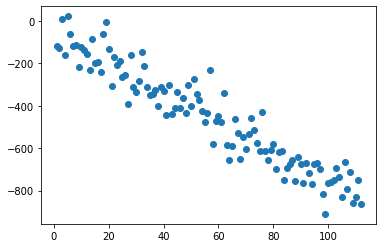

In [340]:
import matplotlib.pyplot as plt
plt.scatter(X, y)

In [341]:
def normalise(array):
    minValue = array[0]
    maxValue = array[0]
    sumValues = 0
    numElements = len(array)
    for x in array:
        sumValues = sumValues + x
        if x > maxValue:
            maxValue = x
        if x < minValue:
            minValue = x
    rangeValues = maxValue - minValue
    normalisedArray = array.astype("double")
    for i in range(numElements):
        normalisedValue = array[i] / rangeValues
        normalisedArray[i] = normalisedValue
    return normalisedArray, rangeValues

In [342]:
normY, rangeValuesY = normalise(y)
normX, rangeValuesX = normalise(X)

In [329]:
print(rangeValuesY[0])
print(rangeValuesX[0])

933.46974174408
111


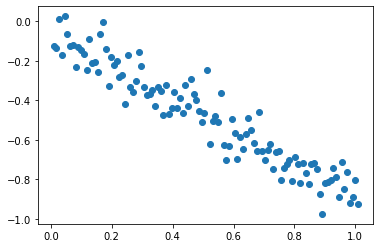

In [330]:
plt.scatter(normX, normY)

In [343]:
def gradientDescent(xs, ys, alpha=0.2, repititions=100):
    theta0 = 0
    theta1 = 0
    yHat = lambda theta0, theta1, x: theta0 + theta1 * x
    
    m = len(xs)
    for _ in range(repititions):
        deltaCostTheta0 = 0
        deltaCostTheta1 = 0
        for i in range(m):
            deltaCostTheta0 += (yHat(theta0, theta1, xs[i]) - ys[i])
            deltaCostTheta1 += (yHat(theta0, theta1, xs[i]) - ys[i]) * xs[i]
        deltaCostTheta0 = 2 * (deltaCostTheta0 / m)
        deltaCostTheta1 = 2 * (deltaCostTheta1 / m)
        theta0 += alpha * deltaCostTheta0 * -1
        theta1 += alpha * deltaCostTheta1 * -1
        
    return (lambda x: yHat(theta0, theta1, x)), theta0, theta1

In [344]:
yHat, theta0, theta1 = gradientDescent(normX, normY)
#nonNormYHat, nonNormTheta0, nonNormTheta0 = gradientDescent(X, y)

theta0:  [-450.23503825]
theta1:  [10.67983028]


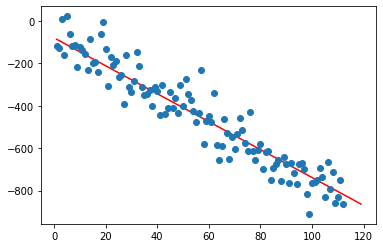

In [345]:
deNormYHat = lambda t0, t1, x: t0 + t1 * x

denormt0 = theta0 * rangeValuesY[0]
denormt1 = theta1 * (rangeValuesY[0]/rangeValuesX[0])

denormX = np.arange(1, 120)
deNormPredY = denormt0 + denormt1 * denormX

plt.plot(denormX, deNormPredY, 'r-', X, y, 'o')

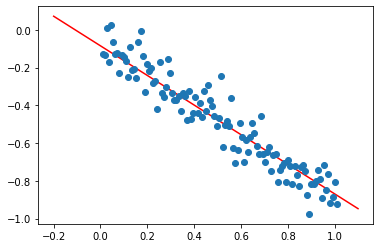

In [346]:
predX = np.arange(-0.2, 1.2, 0.1)
predY = yHat(predX)
plt.plot(predX, predY, 'r-', normX, normY, 'o')

In [347]:
def gradientDescentCostFunc(xs, ys, alpha=0.2, repititions=100):
    theta0 = 0
    theta1 = 0
    yHat = lambda theta0, theta1, x: theta0 + theta1 * x
    ySquaredError = lambda yHat, y: (yHat - y) * (yHat - y)
    
    def meanSquaredError(xs, ys, theta0, theta1):
        sumError=0 
        for i in range(len(ys)): 
            sumError += ySquaredError(yHat(theta0, theta1, xs[i]), ys[i])
        return sumError/len(ys)

    errors = []

    m = len(xs)
    for _ in range(repititions):
        deltaCostTheta0 = 0
        deltaCostTheta1 = 0
        for i in range(m):
            deltaCostTheta0 += (yHat(theta0, theta1, xs[i]) - ys[i])
            deltaCostTheta1 += (yHat(theta0, theta1, xs[i]) - ys[i]) * xs[i]
        deltaCostTheta0 = 2 * (deltaCostTheta0 / m)
        deltaCostTheta1 = 2 * (deltaCostTheta1 / m)
        theta0 += alpha * deltaCostTheta0 * -1
        theta1 += alpha * deltaCostTheta1 * -1
        errors.append(meanSquaredError(xs, ys, theta0, theta1)[0])
        
    return errors

In [251]:
costOverTime = gradientDescentCostFunc(normX, normY, 0.2, 20)
normalise(np.array(costOverTime))

(array([996.10570144, 995.63470761, 995.40154386, 995.28471971,
        995.22485146, 995.19290521, 995.17468316, 995.16324116,
        995.15518184, 995.14884212, 995.14340704, 995.13847639,
        995.13385282, 995.12943823, 995.12518307, 995.1210616 ,
        995.11705974, 995.11316917, 995.10938442, 995.10570144]),
 259.025811265863)

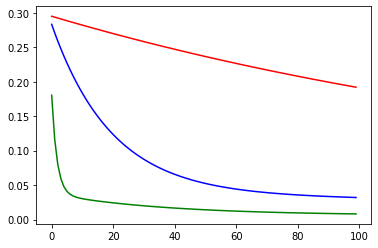

In [277]:
iterations = 100
iterI = np.arange(0, iterations)

costOverTime001 = gradientDescentCostFunc(normX, normY, 0.001, iterations)
costOverTime01 = gradientDescentCostFunc(normX, normY, 0.01, iterations)
costOverTime1 = gradientDescentCostFunc(normX, normY, 0.1, iterations)

plt.plot(iterI, costOverTime001, 'r-', iterI, costOverTime01, 'b-', iterI, costOverTime1, 'g-')

0.005931339975058579

In [275]:
mean = 0
for i in range(len(normY)):
    mean += normY[i]
mean = mean / len(normY)

ySquaredError = lambda yHat, y: (yHat - y) * (yHat - y)

sumError=0 
for j in range(len(normY)): 
    sumError += ySquaredError(mean, normY[i])
meanSquaredError = sumError/len(normY)

print(costOverTime1[len(costOverTime1)-1])
print(meanSquaredError[0])

0.005931339975058579
0.19544912878662732


In [348]:
yHat = lambda theta0, theta1, x: theta0 + theta1 * x
ySquaredError = lambda yHat, y: (yHat - y) * (yHat - y)

def meanSquaredError(xs, ys, theta0, theta1):
    sumError=0 
    for i in range(len(ys)): 
        sumError += ySquaredError(yHat(theta0, theta1, xs[i]), ys[i])
    return sumError/len(ys)

In [349]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X, y)
print(model.intercept_, model.coef_)
skt0 = model.intercept_[0]
skt1 = model.coef_[0][0]

[-57.96094699] [[-6.94290427]]


In [350]:
#print(theta0, theta1)
print(denormt0)
print(denormt1)

[-79.00039074]
[-6.59525294]


In [353]:
meanSquaredError(X, y, skt0, skt1)

array([5168.36655771])

In [354]:
meanSquaredError(X, y, denormt0, denormt1)

array([5296.64899471])